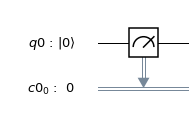

In [1]:
import numpy as np
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import BasicAer, IBMQ
from qiskit.tools.visualization import plot_histogram


backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default
#define ground state basis kets
zero = np.array([[1],[0]])
one = np.array([[0],[1]])

#define a bit flip operator
X = np.array([[0,1],[1,0]])

#define quantum and classical registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

#measure and draw the quantum circuit ground state
qc_ground = QuantumCircuit(qr, cr)
#measure quantum circuit ground state
qc_ground.measure(qr[0], cr[0])
#draw quantum circuit ground state
qc_ground.draw(output='mpl')

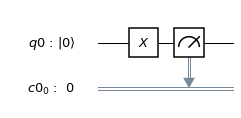

In [2]:
#measure and draw the quantum circuit excited state
qc_excited = QuantumCircuit(qr, cr)
#perform the bit flip
qc_excited.x(qr)
#measure quantum circuit excited state
qc_excited.measure(qr[0],cr[0])
#draw the excited state
qc_excited.draw(output='mpl')

There is on additional step in the measuring and drawing the quantum circuit excited state. The x(qr) operator is also known as the $\sigma_x$ operator or one of the Pauli Spin Matrices and what it does is it performs a 'spin flip', i.e. exchanging 1 with 0 and 0 with 1.

In [3]:
#now run both circuits as a job on the backend we defined above which here is local simulation
circuits = [qc_ground, qc_excited]
job = execute(circuits, backend)
result = job.result()

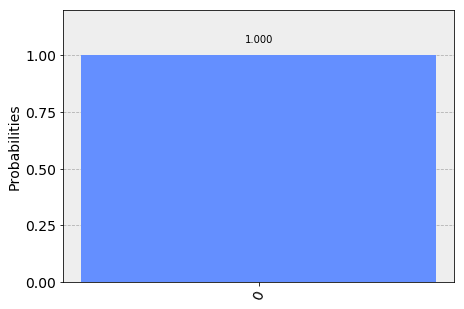

In [4]:
#plot the ground state as a histogram
plot_histogram(result.get_counts(qc_ground))

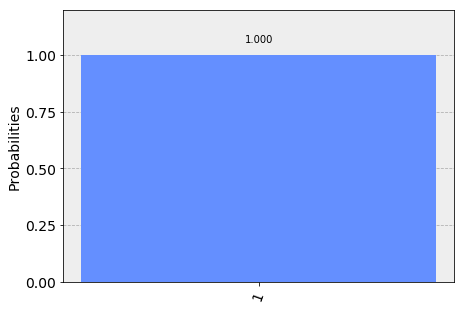

In [5]:
#plot the excited state as a histogram
plot_histogram(result.get_counts(qc_excited))

So far no surprises, everthing works as in the classical case.
Now let us do some real quantum stuff by doing superposition.

In [6]:
# Quantum circuit superposition 
qc_superposition = QuantumCircuit(qr, cr)
qc_superposition.h(qr)
qc_superposition.measure(qr[0], cr[0])
qc_superposition.draw()

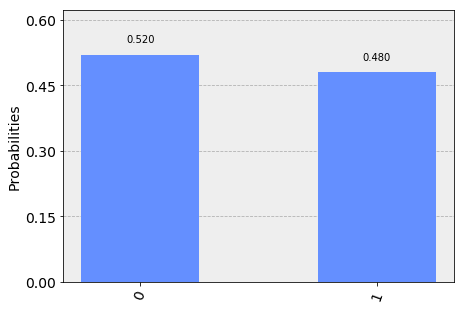

In [7]:
job = execute(qc_superposition, backend, shots = 1024)
result = job.result()

plot_histogram(result.get_counts(qc_superposition))

Note that here we are not doing one measurement but a number of superpositions and measurements indicated by "shots" is performed and in our case, in 50.9% of the cases the result was Zero while in 49.1% of cases the result was One.
Also the higher the number of shots, the more the result approaches the statistical 50-50 result.